In [29]:
import sys
import os
import pandas as pd
import seaborn as sns
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# 1. Исходные данные

In [2]:
PATH_TO_PROJECT: str = 'C:\\Users\\Mark\\PycharmProjects\\machineLearningNstu'
sys.path.append(PATH_TO_PROJECT)

PATH_TO_DIESEL: str = os.path.join(PATH_TO_PROJECT, 'data', 'raw', 'diesel_air.csv')
PATH_TO_HEAVY_OIL: str = os.path.join(PATH_TO_PROJECT, 'data', 'raw', 'heavy_oil_air.csv')

diesel_df: pd.DataFrame = pd.read_csv(PATH_TO_DIESEL)
heavy_oil_df: pd.DataFrame = pd.read_csv(PATH_TO_HEAVY_OIL) 

In [3]:
diesel_df.head()

,F_fuel,F_air,O2,CO,NO,NO2,NOx,CO2,SO2
0,0.200,1.784,11.828453,679.846033,0.0,8.741990,8.176684,7.377569,67.435602
1,0.216,1.784,11.828453,679.846033,0.0,8.741990,8.176684,7.377569,67.435602
2,0.232,1.784,11.828453,679.846033,0.0,8.741990,8.176684,7.377569,67.435602
3,0.248,1.784,11.828453,679.846033,0.0,8.741990,8.176684,7.377569,67.435602
4,0.264,1.784,11.807047,678.252766,0.0,8.731427,8.176684,7.379899,67.510727


In [4]:
heavy_oil_df.head()

,F_fuel,F_air,O2,CO,NO,NOx,CO2,SO2
0,0.200,1.784,11.192942,958.172981,187.324359,188.523741,7.241927,656.002634
1,0.216,1.784,11.192942,958.172981,187.324359,188.523741,7.241927,656.002634
2,0.232,1.784,11.192942,958.172981,187.324359,188.523741,7.241927,656.002634
3,0.248,1.784,11.192942,958.172981,187.331832,188.524245,7.241927,656.002634
4,0.264,1.784,11.177439,957.951340,187.345810,188.531915,7.241967,656.526937


In [5]:
diesel_df: pd.DataFrame = pd.concat([diesel_df['NOx'], diesel_df['SO2']], axis=1)
diesel_df['Type'] = 1
heavy_oil_df: pd.DataFrame = pd.concat([heavy_oil_df['NOx'], heavy_oil_df['SO2']], axis=1)
heavy_oil_df['Type'] = 0
df: pd.DataFrame = pd.concat([diesel_df, heavy_oil_df], axis=0)
df

,NOx,SO2,Type
0,8.176684,67.435602,1
1,8.176684,67.435602,1
2,8.176684,67.435602,1
3,8.176684,67.435602,1
4,8.176684,67.510727,1
...,...,...,...
9995,341.647231,1222.108111,0
9996,341.718569,1222.286446,0
9997,341.870980,1222.486350,0
9998,341.917804,1222.547746,0


<Axes: xlabel='NOx', ylabel='SO2'>

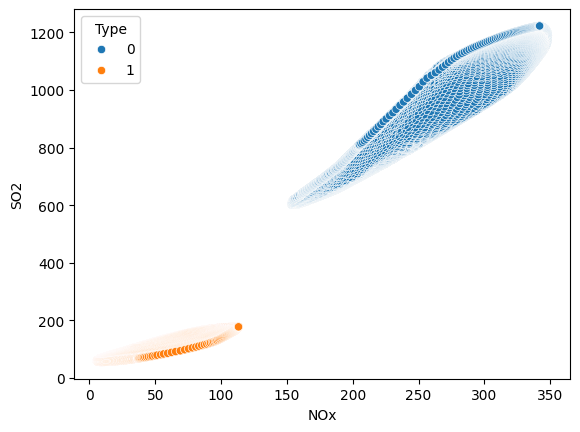

In [6]:
sns.scatterplot(data=df, x='NOx', y='SO2', hue='Type')

# 2. Обучающая выборка 

4000

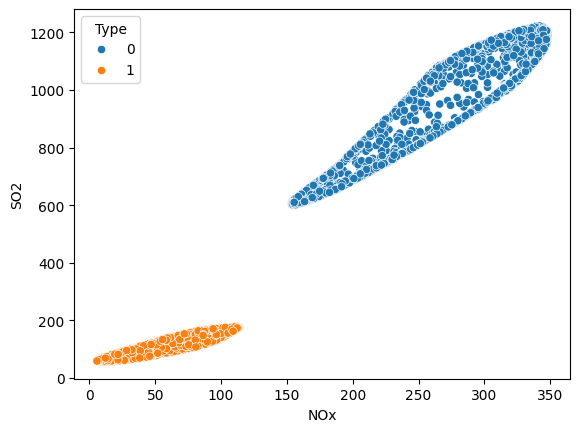

In [75]:
training_sample_size: int = int(len(df) / 5)
training_sample: pd.DataFrame = df.sample(training_sample_size)
sns.scatterplot(data=training_sample, x='NOx', y='SO2', hue='Type')

In [8]:
training_sample.head()

,NOx,SO2,Type
4247,272.480726,881.773093,0
2485,63.832915,142.815785,1
548,256.796809,828.581633,0
5136,212.310755,736.519291,0
5933,205.620844,723.080087,0


In [9]:
training_sample['Type'].value_counts(normalize=True)

Type
1    0.50075
0    0.49925
Name: proportion, dtype: float64

# 3. Реализация метода опорных векторов

# 3.1. Реализация в автоматическом режиме

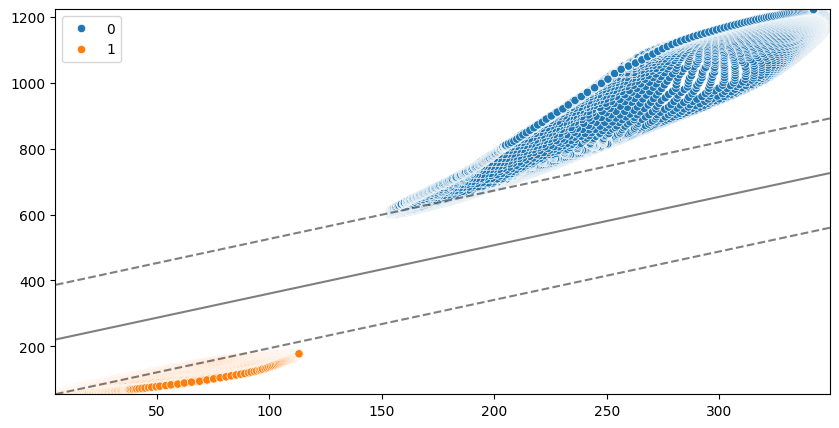

In [62]:
x: list[float, float] = [list(sample) for sample in zip(training_sample['NOx'], training_sample['SO2'])]
y: list[float] = list(training_sample['Type'])

clf = svm.LinearSVC(dual="auto").fit(x, y)

x = np.array(x)
x: list[float, float] = [list(sample) for sample in zip(df['NOx'], df['SO2'])]
y: list[float] = list(df['Type'])
x = np.array(x)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )

# 3.2. Реализация в ручном режиме

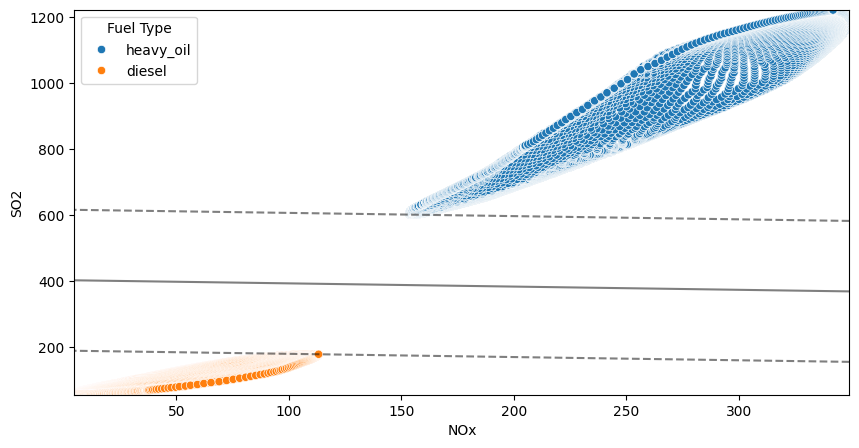

In [81]:
x: list[float, float] = [list(sample) for sample in zip(training_sample['NOx'], training_sample['SO2'])]
y: list[float] = list(training_sample['Type'])

clf = svm.SVC(C=1.0, kernel='linear').fit(x, y)

x: list[float, float] = [list(sample) for sample in zip(df['NOx'], df['SO2'])]
y: list[float] = list(df['Type'])
x = np.array(x)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.xlabel('NOx')
plt.ylabel('SO2')

handles, labels = ax.get_legend_handles_labels()

new_labels = ['heavy_oil', 'diesel']
ax.legend(handles=handles, labels=new_labels, title="Fuel Type")